# Progetto di social
## Analisi di un dataset
Analisi di un dataset di articoli del dipartimento DMIF di uniud reperito da scopus.

In [1]:
# Lista delle librerie da controllare
required_packages = ["pandas", "networkx", "pyvis", "matplotlib"]
import importlib
import subprocess
import sys
for package in required_packages:
    try:
        importlib.import_module(package)
        print(f"{package} già installato ✅")
    except ImportError:
        print(f"{package} non trovato. Installazione in corso...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} installato correttamente")

pandas già installato ✅
networkx già installato ✅
pyvis già installato ✅
matplotlib già installato ✅


In [2]:
import pandas as pd
df=pd.read_csv('dataset.csv')
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Lancia, G.; Dalpasso, M.","Lancia, Giuseppe G. (6701584197); Dalpasso, Ma...",6701584197; 6603897248,Speeding Up Floyd–Warshall’s Algorithm to Comp...,2025,Algorithms,18,9,560,NaN,...,NaN,NaN,NaN,English,Algorithms,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-105017372448
1,"Da Ros, F.; Di Gaspero, L.; Kletzander, L.; La...","Da Ros, Francesca (58134137500); Di Gaspero, L...",58134137500; 6505944235; 57194560339; 57188717...,Dynamic Temperature Control of Simulated Annea...,2025,NaN,NaN,NaN,NaN,184,...,9798400714658,NaN,NaN,English,GECCO - Proc. Genetic Evol. Comput. Conf.,Conference paper,Final,NaN,Scopus,2-s2.0-105013077196
2,"Bacchetti, E.; de Nardin, A.; Giannarini, G.; ...","Bacchetti, Emiliano (59995162800); de Nardin, ...",59995162800; 57259162600; 55883317500; 2448058...,A Deep Learning Model Integrating Clinical and...,2025,Cancers,17,13,2257,NaN,...,NaN,NaN,NaN,English,Cancers,Article,Final,All Open Access; Gold Open Access; Green Accep...,Scopus,2-s2.0-105010643815
3,"Ozkilinc, O.; Soler, M.A.; Giannozzi, P.; Apar...","Ozkilinc, Ozge (58138235700); Soler, Miguel A....",58138235700; 8718855800; 7004488307; 572046647...,The Single-Parameter Bragg–Williams Model for ...,2025,International Journal of Molecular Sciences,26,3,997,NaN,...,NaN,NaN,39940766.0,English,Int. J. Mol. Sci.,Article,Final,All Open Access; Gold Open Access; Green Accep...,Scopus,2-s2.0-85217742685
4,"Faletič, S.; Micheli, M.; Pospiec, G.","Faletič, Sergej (56595108900); Micheli, Marisa...",56595108900; 59664609000; 59665606800,Teaching and learning quantum entanglement: a ...,2025,Journal of Physics: Conference Series,2950,1,012025,NaN,...,9788394593742; 9781628905861,NaN,NaN,English,J. Phys. Conf. Ser.,Conference paper,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85219573912


In [3]:
#Test per pulizia dataframe

#conta max val
num_articoli = df.shape[0]
# Conta valori nulli per colonna
null_counts = df.isnull().sum()
# Conta valori pari a 0 per colonna
zero_counts = (df == 0).sum()
print(f"Numero di articoli: {num_articoli}")
# Combina i due risultati in un DataFrame
missing_summary = pd.DataFrame({
    "null_values": null_counts,
    "zero_values": zero_counts
})
missing_summary


Numero di articoli: 143


,null_values,zero_values
Authors,0,0
Author full names,0,0
Author(s) ID,0,0
Title,0,0
Year,0,0
Source title,20,0
Volume,23,0
Issue,77,0
Art. No.,95,0
Page start,62,0


In [4]:
import pandas as pd

# Carica il dataset originale
df = pd.read_csv("dataset.csv")

# Soglia: un terzo dei valori
limite = len(df) / 3

# Lista delle colonne da eliminare
cols_to_drop = []

for col in df.columns:
    num_null = df[col].isna().sum()
    
    # conta gli zeri solo se la colonna è numerica
    num_zero = 0
    if pd.api.types.is_numeric_dtype(df[col]):
        num_zero = (df[col] == 0).sum()

    #toglie le colonne con un solo valore
    unique_vals = df[col].dropna().unique()
        # se c'è 0 o 1 valore unico → colonna costante
    if len(unique_vals) <= 1:
        cols_to_drop.append(col)

            
    # Se la somma di nulli + zeri supera un terzo, togli la colonna
    if (num_null + num_zero) >= limite:
        cols_to_drop.append(col)


# Crea il nuovo dataset pulito
df_clean = df.drop(columns=cols_to_drop)

# Salva come nuovo file
df_clean.to_csv("nuovo_dataset.csv", index=False)

# Mostra le colonne rimosse
cols_to_drop


['Issue',
 'Art. No.',
 'Page start',
 'Page end',
 'Page count',
 'Page count',
 'Molecular Sequence Numbers',
 'Molecular Sequence Numbers',
 'Chemicals/CAS',
 'Tradenames',
 'Manufacturers',
 'Funding Details',
 'Funding Texts',
 'Editors',
 'Sponsors',
 'Conference name',
 'Conference date',
 'Conference location',
 'Conference code',
 'ISBN',
 'CODEN',
 'PubMed ID',
 'Language of Original Document',
 'Open Access',
 'Source']

In [5]:
print(df.columns)
df=pd.read_csv("nuovo_dataset.csv")
num_colonne = df.shape[1]
print("numero di colonne: ", num_colonne)
df.head(46)



Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS',
       'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Texts',
       'References', 'Correspondence Address', 'Editors', 'Publisher',
       'Sponsors', 'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')
numero di colonne:  23


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Cited by,DOI,Link,...,Author Keywords,Index Keywords,References,Correspondence Address,Publisher,ISSN,Abbreviated Source Title,Document Type,Publication Stage,EID
0,"Lancia, G.; Dalpasso, M.","Lancia, Giuseppe G. (6701584197); Dalpasso, Ma...",6701584197; 6603897248,Speeding Up Floyd–Warshall’s Algorithm to Comp...,2025,Algorithms,18,0,10.3390/a18090560,https://www.scopus.com/inward/record.uri?eid=2...,...,all-pairs shortest paths; FastSet data structu...,Computational complexity; Graph algorithms; Al...,"Floyd, Robert W., Algorithm 97: Shortest path,...","G. Lancia; Department of Mathematics, Computer...",Multidisciplinary Digital Publishing Institute...,19994893,Algorithms,Article,Final,2-s2.0-105017372448
1,"Da Ros, F.; Di Gaspero, L.; Kletzander, L.; La...","Da Ros, Francesca (58134137500); Di Gaspero, L...",58134137500; 6505944235; 57194560339; 57188717...,Dynamic Temperature Control of Simulated Annea...,2025,NaN,NaN,0,10.1145/3712256.3726390,https://www.scopus.com/inward/record.uri?eid=2...,...,combinatorial optimization; empirical analysis...,Application programs; Artificial intelligence;...,"Adriaensen, Steven, Fair-share ILS: A simple s...",NaN,"Association for Computing Machinery, Inc",NaN,GECCO - Proc. Genetic Evol. Comput. Conf.,Conference paper,Final,2-s2.0-105013077196
2,"Bacchetti, E.; de Nardin, A.; Giannarini, G.; ...","Bacchetti, Emiliano (59995162800); de Nardin, ...",59995162800; 57259162600; 55883317500; 2448058...,A Deep Learning Model Integrating Clinical and...,2025,Cancers,17,0,10.3390/cancers17132257,https://www.scopus.com/inward/record.uri?eid=2...,...,artificial intelligence; biopsy; magnetic reso...,alpha adrenergic receptor blocking agent; pros...,"Cornford, Philip A., EAU-EANM-ESTRO-ESUR-ISUP-...","G. Giannarini; Urology Unit, University Hospit...",Multidisciplinary Digital Publishing Institute...,20726694,Cancers,Article,Final,2-s2.0-105010643815
3,"Ozkilinc, O.; Soler, M.A.; Giannozzi, P.; Apar...","Ozkilinc, Ozge (58138235700); Soler, Miguel A....",58138235700; 8718855800; 7004488307; 572046647...,The Single-Parameter Bragg–Williams Model for ...,2025,International Journal of Molecular Sciences,26,0,10.3390/ijms26030997,https://www.scopus.com/inward/record.uri?eid=2...,...,binary mixtures; Bragg–Williams; eutectic solv...,deep eutectic solvent; solvent; Article; Bragg...,"Abbott, Andrew P., Deep Eutectic Solvents form...",F. Fogolari; Dipartimento di Scienze Matematic...,Multidisciplinary Digital Publishing Institute...,14220067; 16616596,Int. J. Mol. Sci.,Article,Final,2-s2.0-85217742685
4,"Faletič, S.; Micheli, M.; Pospiec, G.","Faletič, Sergej (56595108900); Micheli, Marisa...",56595108900; 59664609000; 59665606800,Teaching and learning quantum entanglement: a ...,2025,Journal of Physics: Conference Series,2950,0,10.1088/1742-6596/2950/1/012025,https://www.scopus.com/inward/record.uri?eid=2...,...,NaN,Quantum optics; Empirical research; Fundamenta...,"J Phys Conf Ser, (2021); Qtedu Consortium 2021...","S. Faletič; University of Ljubljana, Faculty o...",Institute of Physics,17426588; 17426596,J. Phys. Conf. Ser.,Conference paper,Final,2-s2.0-85219573912
5,"Unal, A.; Michelini, M.; Santi, L.G.","Unal, Aycin (56938060100); Michelini, Marisa (...",56938060100; 23016123800; 35227961200,Teachers' Perspectives and Practices on Teachi...,2025,Journal of Physics: Conference Series,2950,0,10.1088/1742-6596/2950/1/012008,https://www.scopus.com/inward/record.uri?eid=2...,...,NaN,Elementary and middle schools; Method and tech...,"Hadenfeldt, Jan Christoph, Framing students’ p...","A. Ünal; Research Unit in Physics Education, D...",Institute of Physics,17426588; 17426596,J. Phys. Conf. Ser.,Conference paper,Final,2-s2.0-85219548280
6,"Della Rossa, M.; Tanwani, A.","Della Rossa, Matteo (57207046261); Tanwani, An...",57207046261; 26422519500,Converse Lyapunov results for stability of swi...,2025,"ESAIM - Control, Optimisation and Calcu

In [6]:
#librerie
import pandas as pd
import networkx as nx
from pyvis.network import Network
import itertools
from collections import Counter
import matplotlib.pyplot as plt

In [7]:
df["authors_list"] = df["Authors"].str.split(",")
df["authors_list"] = df["authors_list"].apply(
    lambda x: [a.strip() for a in x] if isinstance(x, list) else x
)
df["authors_list"]



0                             [Lancia, G.; Dalpasso, M.]
1      [Da Ros, F.; Di Gaspero, L.; Kletzander, L.; L...
2      [Bacchetti, E.; de Nardin, A.; Giannarini, G.;...
3      [Ozkilinc, O.; Soler, M.A.; Giannozzi, P.; Apa...
4                [Faletič, S.; Micheli, M.; Pospiec, G.]
                             ...                        
138               [Alpuente, M.; Ballis, D.; Sapiña, J.]
139            [Dattolo, A.; de March, C.; Luccio, F.L.]
140    [Altenkirch, T.; Chaudhuri, K.; Dowek, G.; Fel...
141                                       [Corbatto, M.]
142         [Omodeo, E.G.; Policriti, A.; Tomescu, A.I.]
Name: authors_list, Length: 143, dtype: object

## Numero di articoli pubblicati dagli autori

In [8]:
all_authors = list(itertools.chain.from_iterable(df["authors_list"].dropna()))
pd.Series(all_authors).value_counts()


M.                    45
A.                    14
G.L.                  14
F.                     9
G.                     9
                      ..
R.; Foresti            1
A.; Girometti          1
C.S.; Sojakova         1
W.; Sacerdoti Coen     1
F.; Ricciotti          1
Name: count, Length: 580, dtype: int64

## Costruzione del grafo
Corretto con non dia in output nulla perchè è necessario vederlo come file html che si genera a fine documente

In [9]:
G = nx.Graph()

for authors in df["authors_list"].dropna():
    for a1, a2 in itertools.combinations(authors, 2):
        if G.has_edge(a1, a2):
            G[a1][a2]["weight"] += 1
        else:
            G.add_edge(a1, a2, weight=1)


## Calcolo delle misure di centralità
Spiaccicarci un po di teoria

In [10]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

pd.DataFrame({
    "degree": degree_centrality,
    "betweenness": betweenness_centrality,
    "closeness": closeness_centrality
}).sort_values("degree", ascending=False)


,degree,betweenness,closeness
M.,0.255613,0.362447,0.415752
M.; Gigli,0.186528,0.155681,0.370456
G.L.; Valente,0.162349,0.129741,0.369020
G.; Antelmi,0.145078,0.001093,0.294213
Z.,0.145078,0.001093,0.294213
...,...,...,...
Ganjali Koli,0.003454,0.000000,0.205011
M.; Lancia,0.003454,0.000000,0.232894
Stefanel,0.001727,0.000000,0.227878
T.,0.001727,0.000000,0.001727


## Creazione di grafi
Pezzo di codice usato per la visualizzazione

In [11]:
net = Network(height="750px", width="100%", notebook=True)
net.from_nx(G)
net.show("coauthors_graph.html")


coauthors_graph.html


### Grafo di relazione tra collaborazioni tra autori evolutosi nel tempo
Boh


In [12]:

#Cella 1
#df = pd.read_csv("dataset.csv")

# prepara lista autori
df["authors_list"] = df["Authors"].str.split(",")
df["authors_list"] = df["authors_list"].apply(
    lambda x: [a.strip() for a in x] if isinstance(x, list) else x
)

# assicura che Year sia numerico
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

df.head()


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Cited by,DOI,Link,...,Index Keywords,References,Correspondence Address,Publisher,ISSN,Abbreviated Source Title,Document Type,Publication Stage,EID,authors_list
0,"Lancia, G.; Dalpasso, M.","Lancia, Giuseppe G. (6701584197); Dalpasso, Ma...",6701584197; 6603897248,Speeding Up Floyd–Warshall’s Algorithm to Comp...,2025,Algorithms,18,0,10.3390/a18090560,https://www.scopus.com/inward/record.uri?eid=2...,...,Computational complexity; Graph algorithms; Al...,"Floyd, Robert W., Algorithm 97: Shortest path,...","G. Lancia; Department of Mathematics, Computer...",Multidisciplinary Digital Publishing Institute...,19994893,Algorithms,Article,Final,2-s2.0-105017372448,"[Lancia, G.; Dalpasso, M.]"
1,"Da Ros, F.; Di Gaspero, L.; Kletzander, L.; La...","Da Ros, Francesca (58134137500); Di Gaspero, L...",58134137500; 6505944235; 57194560339; 57188717...,Dynamic Temperature Control of Simulated Annea...,2025,NaN,NaN,0,10.1145/3712256.3726390,https://www.scopus.com/inward/record.uri?eid=2...,...,Application programs; Artificial intelligence;...,"Adriaensen, Steven, Fair-share ILS: A simple s...",NaN,"Association for Computing Machinery, Inc",NaN,GECCO - Proc. Genetic Evol. Comput. Conf.,Conference paper,Final,2-s2.0-105013077196,"[Da Ros, F.; Di Gaspero, L.; Kletzander, L.; L..."
2,"Bacchetti, E.; de Nardin, A.; Giannarini, G.; ...","Bacchetti, Emiliano (59995162800); de Nardin, ...",59995162800; 57259162600; 55883317500; 2448058...,A Deep Learning Model Integrating Clinical and...,2025,Cancers,17,0,10.3390/cancers17132257,https://www.scopus.com/inward/record.uri?eid=2...,...,alpha adrenergic receptor blocking agent; pros...,"Cornford, Philip A., EAU-EANM-ESTRO-ESUR-ISUP-...","G. Giannarini; Urology Unit, University Hospit...",Multidisciplinary Digital Publishing Institute...,20726694,Cancers,Article,Final,2-s2.0-105010643815,"[Bacchetti, E.; de Nardin, A.; Giannarini, G.;..."
3,"Ozkilinc, O.; Soler, M.A.; Giannozzi, P.; Apar...","Ozkilinc, Ozge (58138235700); Soler, Miguel A....",58138235700; 8718855800; 7004488307; 572046647...,The Single-Parameter Bragg–Williams Model for ...,2025,International Journal of Molecular Sciences,26,0,10.3390/ijms26030997,https://www.scopus.com/inward/record.uri?eid=2...,...,deep eutectic solvent; solvent; Article; Bragg...,"Abbott, Andrew P., Deep Eutectic Solvents form...",F. Fogolari; Dipartimento di Scienze Matematic...,Multidisciplinary Digital Publishing Institute...,14220067; 16616596,Int. J. Mol. Sci.,Article,Final,2-s2.0-85217742685,"[Ozkilinc, O.; Soler, M.A.; Giannozzi, P.; Apa..."
4,"Faletič, S.; Micheli, M.; Pospiec, G.","Faletič, Sergej (56595108900); Micheli, Marisa...",56595108900; 59664609000; 59665606800,Teaching and learning quantum entanglement: a ...,2025,Journal of Physics: Conference Series,2950,0,10.1088/1742-6596/2950/1/012025,https://www.scopus.com/inward/record.uri?eid=2...,...,Quantum optics; Empirical research; Fundamenta...,"J Phys Conf Ser, (2021); Qtedu Consortium 2021...","S. Faletič; University of Ljubljana, Faculty o...",Institute of Physics,17426588; 17426596,J. Phys. Conf. Ser.,Conference paper,Final,2-s2.0-85219573912,"[Faletič, S.; Micheli, M.; Pospiec, G.]"


In [13]:
#Cella 2
anni = sorted(df["Year"].dropna().unique())
anni


[np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023),
 np.int64(2024),
 np.int64(2025)]

In [14]:
#Cella 3
G = nx.Graph()

grafi_per_anno = {}

for anno in anni:
    df_anno = df[df["Year"] == anno]

    for authors in df_anno["authors_list"].dropna():
        for a1, a2 in itertools.combinations(authors, 2):
            if G.has_edge(a1, a2):
                G[a1][a2]["weight"] += 1
            else:
                G.add_edge(a1, a2, weight=1, year=anno)

    # salva una copia del grafo a questo anno
    grafi_per_anno[anno] = G.copy()


In [15]:
from pyvis.network import Network
from IPython.display import display

# Cella 4 — visualizzazione grafi per anno
for anno, G_anno in grafi_per_anno.items():

    # 🔧 FIX: converte tutti gli attributi in tipi Python standard
    for u, v, data in G_anno.edges(data=True):
        for key, value in data.items():
            if hasattr(value, "item"):  # numpy type
                data[key] = value.item()

    for n, data in G_anno.nodes(data=True):
        for key, value in data.items():
            if hasattr(value, "item"):
                data[key] = value.item()

    net = Network(
        height="700px",
        width="100%",
        notebook=True,
        cdn_resources="in_line"
    )

    net.from_nx(G_anno)

    print(f"📅 Collaborazioni anno {anno}")
    display(net)


📅 Collaborazioni anno 2017


<class 'pyvis.network.Network'> |N|=17 |E|=62

📅 Collaborazioni anno 2018


<class 'pyvis.network.Network'> |N|=33 |E|=86

📅 Collaborazioni anno 2019


<class 'pyvis.network.Network'> |N|=106 |E|=367

📅 Collaborazioni anno 2020


<class 'pyvis.network.Network'> |N|=276 |E|=2,375

📅 Collaborazioni anno 2021


<class 'pyvis.network.Network'> |N|=362 |E|=3,312

📅 Collaborazioni anno 2022


<class 'pyvis.network.Network'> |N|=414 |E|=3,656

📅 Collaborazioni anno 2023


<class 'pyvis.network.Network'> |N|=497 |E|=4,310

📅 Collaborazioni anno 2024


<class 'pyvis.network.Network'> |N|=526 |E|=4,398

📅 Collaborazioni anno 2025


<class 'pyvis.network.Network'> |N|=580 |E|=4,562

In [16]:
#slider manuale
import networkx as nx
import itertools

grafi_per_anno = {}

for anno, df_anno in df.groupby("Year"):
    G = nx.Graph()
    for authors in df_anno["authors_list"].dropna():
        for a1, a2 in itertools.combinations(authors, 2):
            if G.has_edge(a1, a2):
                G[a1][a2]["weight"] += 1
            else:
                G.add_edge(a1, a2, weight=1)
    grafi_per_anno[anno] = G


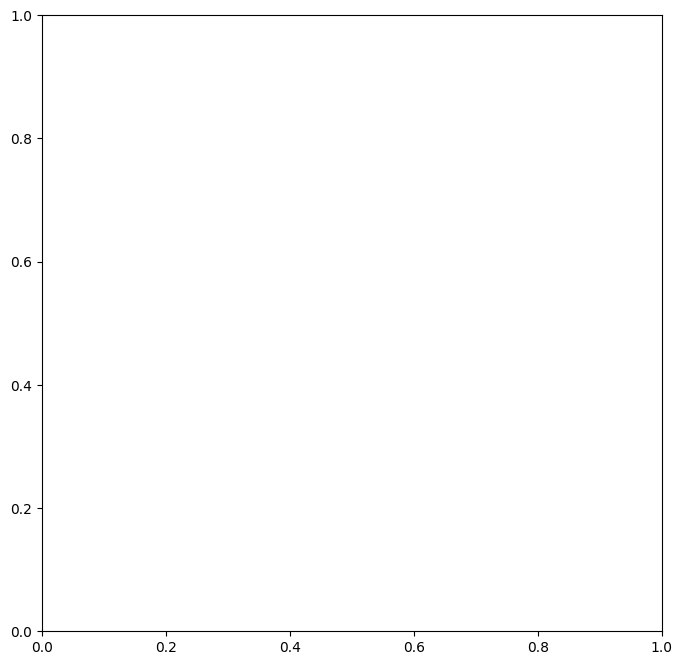

In [17]:
#animazione
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

anni = sorted(grafi_per_anno.keys())
pos = nx.spring_layout(
    nx.compose_all(grafi_per_anno.values()),
    seed=42
)

fig, ax = plt.subplots(figsize=(8, 8))

def update(frame):
    ax.clear()
    anno = anni[frame]
    G = grafi_per_anno[anno]

    nx.draw_networkx(
        G,
        pos=pos,
        ax=ax,
        node_size=50,
        with_labels=False,
        edge_color="gray"
    )
    ax.set_title(f"Collaborazioni – anno {anno}")
    ax.axis("off")

ani = FuncAnimation(fig, update, frames=len(anni), interval=1200)
plt.show()


In [18]:
import plotly.graph_objects as go

def plot_graph_plotly(G, pos, anno):
    edge_x, edge_y = [], []
    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1, color="#888"),
        hoverinfo="none",
        mode="lines"
    )

    node_x, node_y, text = [], [], []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        text.append(node)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode="markers",
        hoverinfo="text",
        text=text,
        marker=dict(size=8, color="blue")
    )

    return edge_trace, node_trace


In [19]:
pos = nx.spring_layout(
    nx.compose_all(grafi_per_anno.values()),
    seed=42
)

frames = []
for anno in sorted(grafi_per_anno.keys()):
    edge, node = plot_graph_plotly(grafi_per_anno[anno], pos, anno)
    frames.append(
        go.Frame(
            data=[edge, node],
            name=str(anno)
        )
    )

fig = go.Figure(
    data=frames[0].data,
    frames=frames,
    layout=go.Layout(
        title="Collaborazioni tra autori nel tempo",
        updatemenus=[{
            "type": "buttons",
            "buttons": [{
                "label": "Play",
                "method": "animate",
                "args": [None]
            }]
        }],
        sliders=[{
            "steps": [
                {"method": "animate", "args": [[f.name]], "label": f.name}
                for f in frames
            ]
        }]
    )
)

fig.show()


In [20]:
import networkx as nx
import plotly.graph_objects as go
# layout puramente grafico, senza interpretazione spaziale
pos = nx.circular_layout(
    nx.compose_all(grafi_per_anno.values())
)
def plot_graph_plotly(G):
    edge_x, edge_y = [], []

    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        mode="lines",
        line=dict(width=1, color="gray"),
        hoverinfo="none"
    )

    node_x, node_y, hover_text = [], [], []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        hover_text.append(
            f"{node}<br>Collaborazioni: {G.degree(node)}"
        )

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode="markers",
        hoverinfo="text",
        text=hover_text,
        marker=dict(
            size=8,
            color="royalblue",
            line=dict(width=0.5, color="black")
        )
    )

    return edge_trace, node_trace



In [21]:
frames = []

for anno in sorted(grafi_per_anno.keys()):
    edge, node = plot_graph_plotly(grafi_per_anno[anno])
    frames.append(
        go.Frame(
            data=[edge, node],
            name=str(anno)
        )
    )

fig = go.Figure(
    data=frames[0].data,
    frames=frames,
    layout=go.Layout(
        title="Collaborazioni tra autori nel tempo",
        paper_bgcolor="white",
        plot_bgcolor="white",

        xaxis=dict(
            showgrid=False,
            zeroline=False,
            visible=False
        ),
        yaxis=dict(
            showgrid=False,
            zeroline=False,
            visible=False
        ),

        updatemenus=[{
            "type": "buttons",
            "buttons": [{
                "label": "Play",
                "method": "animate",
                "args": [
                    None,
                    {
                        "frame": {"duration": 2000, "redraw": True},  # 🔥 rallentato
                        "transition": {"duration": 500},
                        "fromcurrent": True
                    }
                ]
            }]
        }],

        sliders=[{
            "steps": [
                {
                    "method": "animate",
                    "args": [[f.name]],
                    "label": f.name
                }
                for f in frames
            ]
        }]
    )
)

fig.show()


## Grafi interessanti
### Relazioni valutabili
1. Luogo di pubblicazinone-materia: affiliation-source title;
2. Citazioni e materia;
3. keywords più usate
4. referenze
